## 1. Загрузка и обзор данных

In [1]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
except ImportError:

    print("Ошибка при загрузке одной из библиотек.")

In [2]:
df = pd.read_excel('C:/Users/Matvey Wonder/Desktop/работа/TopfaceMedia/data.xlsx')

In [3]:
df.head(10)

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-07-07 00:00:00
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,NaN,оригинал,2021-07-15 00:00:00
7,21.0,3613.7,ОПЛАЧЕНО,Кузнецова,текущая,NaN,оригинал,2021-10-13 00:00:00
8,23.0,8511.7,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,2021-06-08 00:00:00
9,24.0,16347.7,ОПЛАЧЕНО,Андреев,новая,NaN,оригинал,2021-06-23 00:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  607 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB


In [5]:
pd.DataFrame(round(df.isna().mean()*100,)
            ).style.background_gradient('coolwarm')

,0
client_id,1.000000
sum,1.000000
status,0.000000
sale,1.000000
new/current,1.000000
Unnamed: 5,100.000000
document,3.000000
receiving_date,17.000000


Значительное количество пропусков только в колонке с датой получения договора. 17%.

In [6]:
for col in df.columns:
    print(f'{col}: {df[col].nunique()}', end=', ')

client_id: 212, sum: 504, status: 11, sale: 12, new/current: 3, Unnamed: 5: 0, document: 3, receiving_date: 111, 

Видно, что данные загружены не совсем корректно. Необходимо перенести значение месяца совершения сделки из статуса в осдельную колонку. В таблице присутствуют пропуски. Один столбец полностью состоит из пропусков, его можно удалить. Необходимо привести данные к нужным типам.

## 2. Предобработка данных

In [7]:
# Извлекаем строки, содержащие месяцы в столбце "status" и сохраняем их в новый столбец "receiving_month"
df['month_transaction'] = df['status'].str.extract(r'(\b[А-Яа-я]+\s\d{4}\b)')

# Используем метод fillna() с параметром method='ffill' (forward fill)
df['month_transaction'] = df['month_transaction'].fillna(method='ffill')


Переносим месяц из статуса.

In [8]:
df = df.drop('Unnamed: 5', axis=1)

Удаляем пустой столбец.

In [9]:
df = df.replace('-', np.nan).replace('NaT', np.nan)

Прочерк - это тоже пропуск.

In [10]:
df = df.dropna()
df.isna().sum().sum()

0

Поскольку у нас нет возможности заполнить пропуски и они помешают дальнейшему исследованию, их необходимо удалить.

In [11]:
df['client_id'] = df['client_id'].astype(int)

df['receiving_date'] = pd.to_datetime(df['receiving_date'])

Приводим данные у корректным типам.

In [12]:
df['month_transaction'] = df['month_transaction'].str.replace(' 2021','')

# Сопоставляем названия месяцев с числовыми значениями (можно использовать ранее созданный словарь)
months_dict = {
    "Январь": 1,
    "Февраль": 2,
    "Март": 3,
    "Апрель": 4,
    "Май": 5,
    "Июнь": 6,
    "Июль": 7,
    "Август": 8,
    "Сентябрь": 9,
    "Октябрь": 10,
    "Ноябрь": 11,
    "Декабрь": 12
}

# Преобразуем названия месяцев в числовые значения
df['month_transaction'] = df['month_transaction'].map(months_dict)

Для удобства заменим месяц совершения сделки на числа.

In [13]:
df.duplicated().sum()

12

В таблице имеются дубликаты.

In [14]:
round(df.duplicated().sum() / len(df) * 100, 2)

2.02

Общее количество дубликатов составляет 2.02%. Удаляем.

In [15]:
df = df.drop_duplicates()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 2 to 729
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   client_id          583 non-null    int32         
 1   sum                583 non-null    float64       
 2   status             583 non-null    object        
 3   sale               583 non-null    object        
 4   new/current        583 non-null    object        
 5   document           583 non-null    object        
 6   receiving_date     583 non-null    datetime64[ns]
 7   month_transaction  583 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 38.7+ KB


После произведенных действий в таблице осталось 583 строки из 724, но теперь с данными можно работать.

## Вопросы

### 1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [17]:
july_sales = df.query("'2021-07-01' <= receiving_date <= '2021-07-31' and status != 'ПРОСРОЧЕНО'")

july_sales['sum'].sum()

729671.1399999997

Ответ: 729671.1399999997

### 2) Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

In [18]:
print(df['receiving_date'].min(), df['receiving_date'].max())

2021-05-18 00:00:00 2021-11-15 00:00:00


В датафрейме содержатся данные с середины мая по середину ноября 2021 года.

In [19]:
df['receiving_month'] = df['receiving_date'].dt.month
total_per_month = df.groupby('receiving_month')['sum'].sum().reset_index()

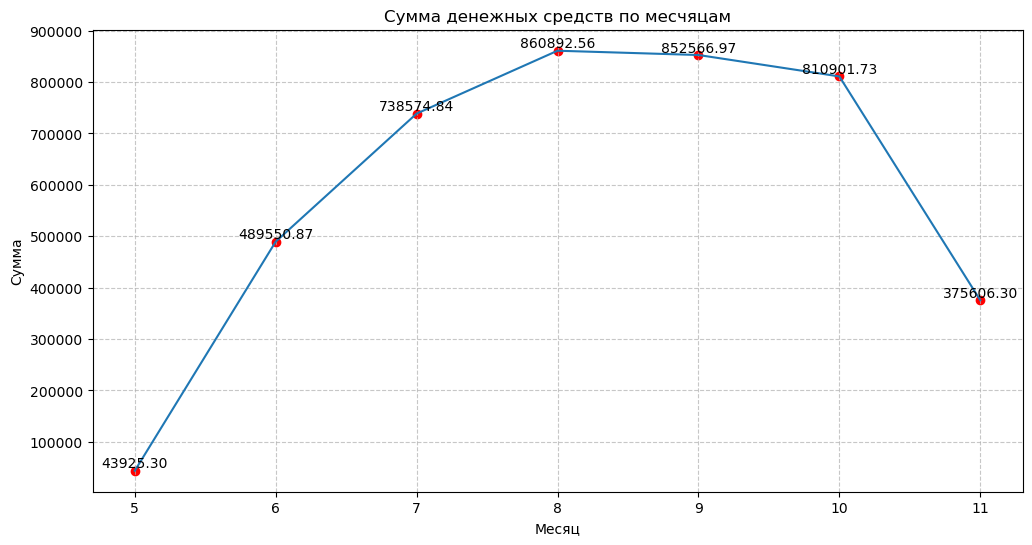

In [20]:
plt.figure(figsize=(12, 6))
ax = plt.gca()

plt.plot(total_per_month['receiving_month'], total_per_month['sum'])

# Добавляем сетку
ax.grid(True, linestyle='--', alpha=0.7)

# Добавляем маркеры 
plt.scatter(total_per_month['receiving_month'], total_per_month['sum'], color='red', marker='o', label='Точки пересечения')

# Добавляем значения над точками
for i, row in total_per_month.iterrows():
    plt.text(row['receiving_month'], row['sum'], f'{row["sum"]:.2f}', ha='center', va='bottom')

plt.title('Cумма денежных средств по месчяцам')
plt.xlabel('Месяц')
plt.ylabel('Cумма')

plt.show()

Ответ: Стоит отметить, что первый и последний месяцы имеют неполные данные, но можно сказать, что сумма средств расла с начала года и достигла пика в августе (860892.56). Далее сумма денежных средств начала медленно уменьшаться к концу года.

### 3) Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [21]:
sept_sales = df.query("'2021-09-01' <= receiving_date <= '2021-09-30' and status == 'ОПЛАЧЕНО'")

top_manager = sept_sales.groupby('sale')['sum'].sum().reset_index().sort_values(by='sum', ascending=False)

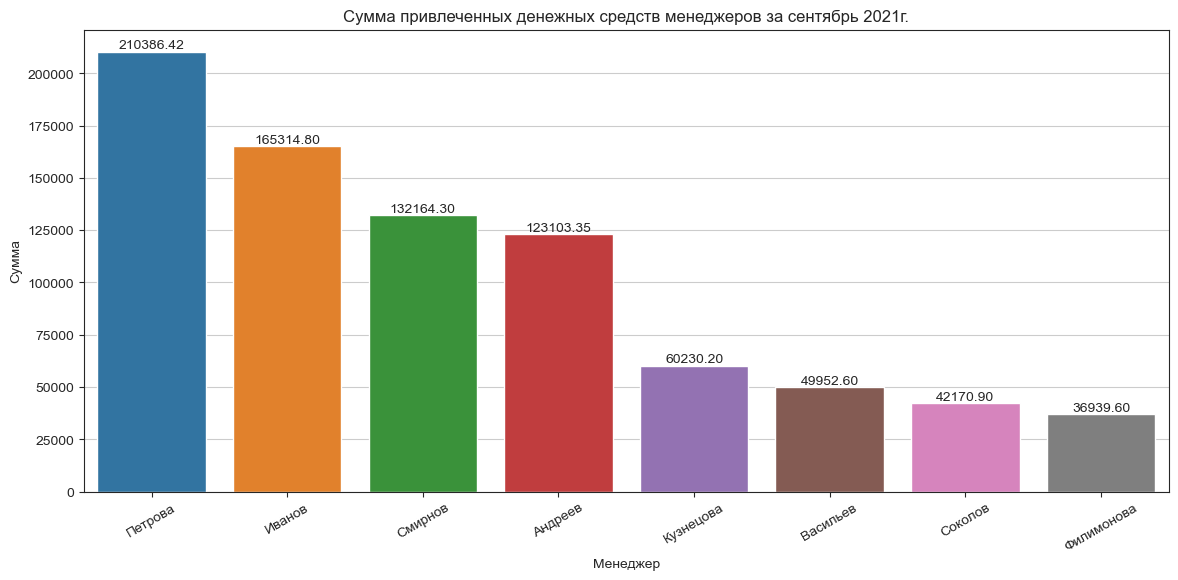

In [22]:
sns.set_style("ticks",{'axes.grid' : True})

plt.figure(figsize = (14,6))

ax = sns.barplot(x='sale', y='sum', data=top_manager)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

ax.set_title('Сумма привлеченных денежных средств менеджеров за сентябрь 2021г.')
ax.set_xlabel('Менеджер')
ax.set_ylabel('Сумма')

plt.show()

Ответ: Больше всего привлеченных средств показал менеджер - Петрова.

### 4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [23]:
oct_sales = df.query("'2021-10-01' <= receiving_date <= '2021-10-31'")

In [24]:
type_transaction = oct_sales.groupby('new/current')['client_id'].count().reset_index()
type_transaction

,new/current,client_id
0,новая,16
1,текущая,98


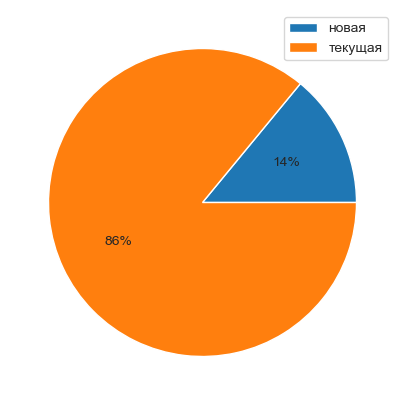

In [25]:
plt.figure(figsize=(10, 5))

plt.pie(type_transaction['client_id'], autopct='%1.0f%%')

plt.legend(labels = type_transaction['new/current'])

plt.show()

Ответ: Текущие сделки заметно преобладали в октябре.

### 5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [26]:
june_sales_originals = df.query("'2021-06-01' <= receiving_date <= '2021-06-30' and document == 'оригинал'")

In [33]:
june_sales_originals[june_sales_originals['month_transaction']==5]['client_id'].count()

76

Ответ: 76 договоров по майским сделкам получено в июне.

## Задание:

За каждую заключенную сделку менеджер получает бонус, который рассчитывается следующим образом.

1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с клиентом (в рассматриваемом месяце).

2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс., и 3 % от суммы, если меньше. При этом статус оплаты может быть любым, кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного договора с клиентом (в рассматриваемом месяце). Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого месяца, считаются остатком на следующий период, который выплачивается по мере прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

In [28]:
# Функция для расчета бонусов
def calculate_bonus(row):
    if row['new/current'] == 'новая' and row['status'] == 'ОПЛАЧЕНО' and row['document'] == 'оригинал':
        return row['sum'] * 0.07
    elif row['new/current'] == 'текущая' and row['status'] != 'ПРОСРОЧЕНО':
        if row['sum'] > 10000:
            return row['sum'] * 0.05
        else:
            return row['sum'] * 0.03
    else:
        return 0

df['bonus'] = df.apply(calculate_bonus, axis=1)

In [29]:
df.head(5)

,client_id,sum,status,sale,new/current,document,receiving_date,month_transaction,receiving_month,bonus
2,14,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,5,7,381.689
3,15,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5,6,699.585
4,16,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5,6,21.591
5,18,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,5,7,127.611
6,20,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15,5,7,173.901


In [30]:
remains = df[df['receiving_month'] != df['month_transaction']]
remains = remains[remains['month_transaction'] <= 6]
remains = remains[remains['receiving_month'] >= 7]

#Отсекаем строки, где договор пришел в тот же месяц, когда совершщена сделка, потому что тогда бонусы выплачиваются сразу.
#Отсекаем сделки после июня и сделки, где договор получен до июля. 

In [35]:
remains = remains.groupby('sale')['bonus'].sum().sort_values(ascending=False).reset_index()
remains

,sale,bonus
0,Петрова,10770.7474
1,Смирнов,6430.2650
2,Иванов,5991.4520
3,Селиванов,5238.8540
4,Кузнецова,4496.9501
5,Андреев,3855.9077
6,Филимонова,2317.9579
7,Васильев,953.8770
8,Соколов,269.2110
